In [1]:
library(carData)

In [2]:
data <- carData::Prestige
data |> head()

                    education income women prestige census type
gov.administrators      13.11  12351 11.16     68.8   1113 prof
general.managers        12.26  25879  4.02     69.1   1130 prof
accountants             12.77   9271 15.70     63.4   1171 prof
purchasing.officers     11.42   8865  9.11     56.8   1175 prof
chemists                14.62   8403 11.68     73.5   2111 prof
physicists              15.64  11030  5.13     77.6   2113 prof

In [3]:
?Prestige

In [4]:
str(data)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [5]:
summary(data)

   education          income          women           prestige         census       type   
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80   Min.   :1113   bc  :44  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23   1st Qu.:3120   prof:31  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60   Median :5135   wc  :23  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83   Mean   :5402   NA's: 4  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27   3rd Qu.:8312            
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20   Max.   :9517            

In [60]:
set.seed(2026)
train_index <- sample(nrow(data), size = 0.6*nrow(data))
print(train_index)

 [1]  93  97  38  45  91  36  48   5  31  44  58  88  19  79  10  54  18  34  12  56  96
[22]  35  84   3  42  61   8  66  99  77  95  71  27  64  50  29  69  17  76   9  89  73
[43]  67  47  57  23  52  41 100 101  25  94  15   1  24 102   6  74   4  60  75


In [61]:
train_data <- data[train_index, ]
head(train_data)

                    education income women prestige census type
house.painters           7.81   4549  2.46     29.9   8785   bc
train.engineers          8.49   8845  0.00     48.9   9131   bc
tellers.cashiers        10.64   2448 91.76     42.3   4133   wc
telephone.operators     10.51   3161 96.14     38.1   4175   wc
carpenters               6.92   5299  0.56     38.9   8781   bc
typists                 11.49   3148 95.97     41.9   4113   wc

In [62]:
test_data <- data[-train_index, ]
head(test_data)

                    education income women prestige census type
general.managers        12.26  25879  4.02     69.1   1130 prof
biologists              15.09   8258 25.65     72.6   2133 prof
surveyors               12.39   5902  1.91     62.0   2161 prof
computer.programers     13.83   8425 15.33     53.8   2183 prof
economists              14.44   8049 57.31     62.2   2311 prof
social.workers          14.21   6336 54.77     55.1   2331 prof

In [63]:
cor(train_data[ ,-6])

            education     income       women   prestige     census
education  1.00000000  0.6589016  0.01671952  0.8733374 -0.8205673
income     0.65890162  1.0000000 -0.49938661  0.7635835 -0.3629897
women      0.01671952 -0.4993866  1.00000000 -0.1512626 -0.2119560
prestige   0.87333745  0.7635835 -0.15126256  1.0000000 -0.6719160
census    -0.82056733 -0.3629897 -0.21195603 -0.6719160  1.0000000

In [11]:
install.packages("corrplot")

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/corrplot_0.95.zip'
Content type 'application/zip' length 3826277 bytes (3.6 MB)
downloaded 3.6 MB



package ‘corrplot’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\RtmpY3lxlq\downloaded_packages


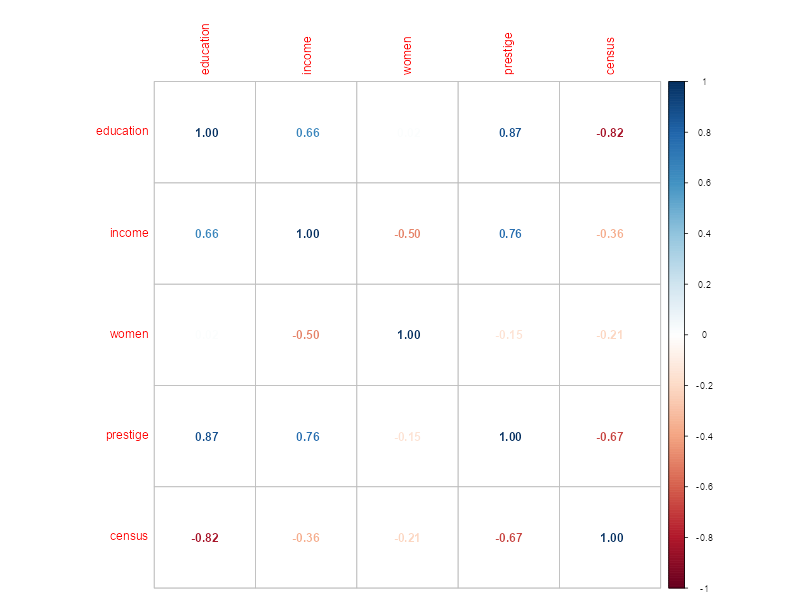

In [64]:
library(corrplot)
corrplot(cor(train_data[,-6]) , method = "number") 

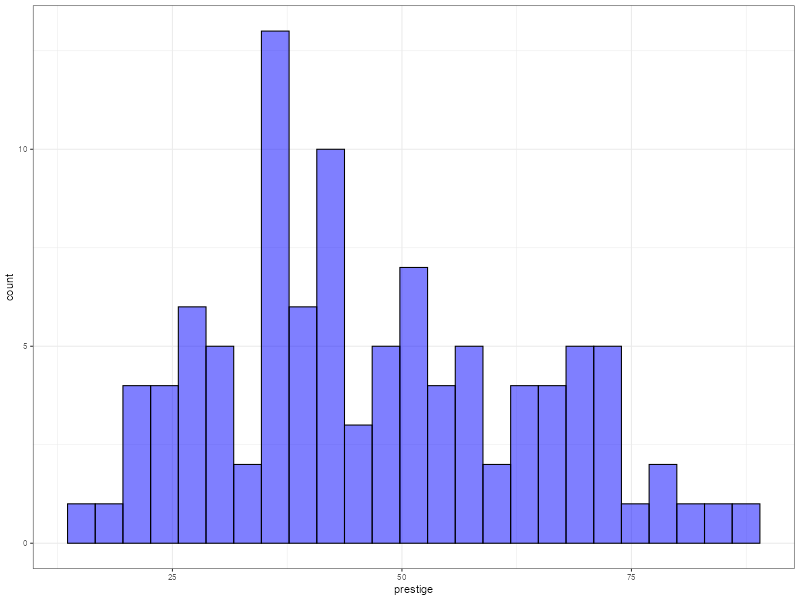

In [65]:
library(ggplot2)

ggplot(data, aes(prestige)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

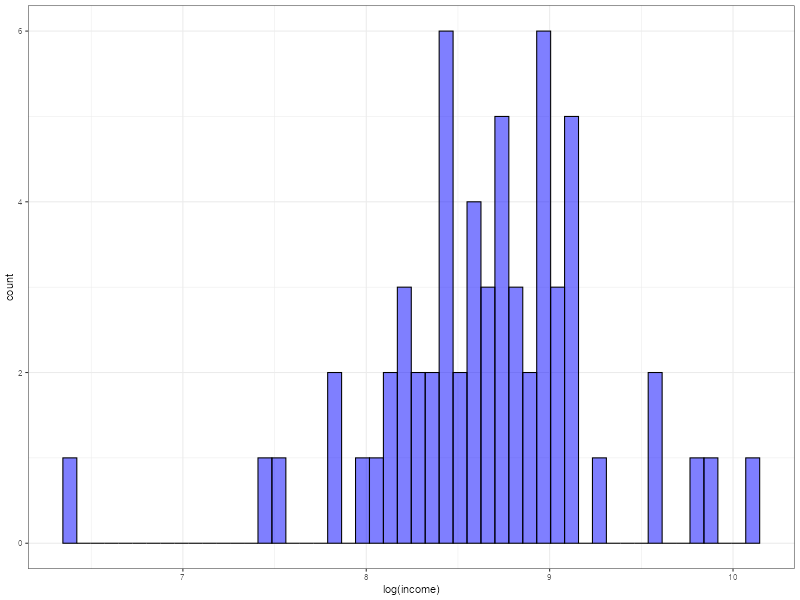

In [22]:
ggplot(train_data, aes(log(income))) + 
    geom_histogram(bins = 50, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

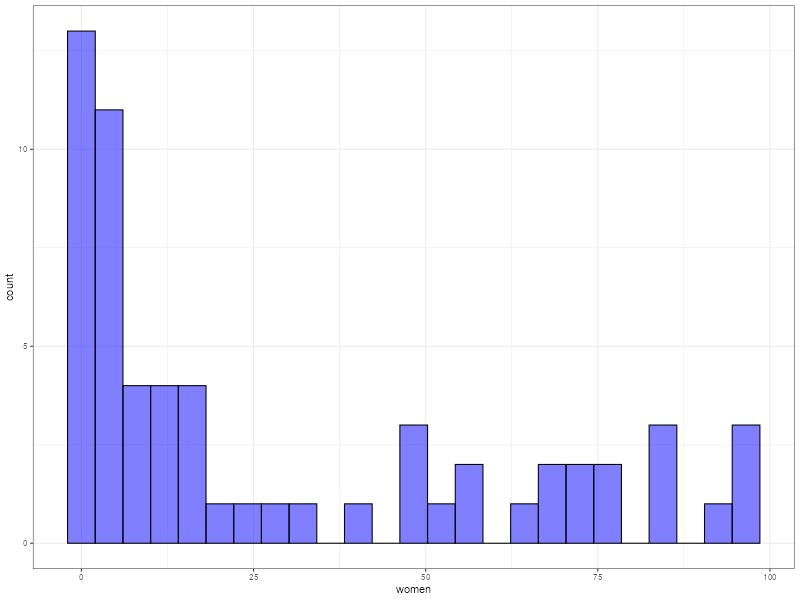

In [18]:
ggplot(train_data, aes(women)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

In [66]:
lm_mod <- lm(formula = prestige ~ income, data = train_data)
summary(lm_mod)


Call:
lm(formula = prestige ~ income, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.437  -8.004  -2.453   7.362  30.581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.512e+01  2.855e+00   8.797 2.49e-12 ***
income      3.221e-03  3.546e-04   9.083 8.30e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.69 on 59 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.576 
F-statistic: 82.51 on 1 and 59 DF,  p-value: 8.299e-13


In [67]:
#install.packages("broom")
library(broom)

lm_mod_view <- tidy(lm_mod)
lm_mod_view

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept) 25.1      2.85          8.80 2.49e-12
2 income       0.00322  0.000355      9.08 8.30e-13

In [68]:
lm_mod <- lm(formula = prestige ~ income + education, data = train_data)
summary(lm_mod)


Call:
lm(formula = prestige ~ income + education, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6467  -3.5747  -0.6966   4.8523  17.7215 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.1955521  4.0571047  -1.774   0.0814 .  
income       0.0014026  0.0003078   4.557 2.72e-05 ***
education    4.1614529  0.4640998   8.967 1.50e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.633 on 58 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.8192 
F-statistic:   137 on 2 and 58 DF,  p-value: < 2.2e-16


In [69]:
lm_mod1 <- lm(formula = prestige ~ log(income) + education, data = train_data)
summary(lm_mod1)


Call:
lm(formula = prestige ~ log(income) + education, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9740  -3.7459   0.0844   3.8964  18.4542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -102.6308    16.4026  -6.257 5.12e-08 ***
log(income)   12.3044     2.1853   5.631 5.49e-07 ***
education      4.0019     0.4279   9.353 3.49e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.153 on 58 degrees of freedom
Multiple R-squared:  0.8466,	Adjusted R-squared:  0.8413 
F-statistic:   160 on 2 and 58 DF,  p-value: < 2.2e-16


In [82]:
lm_mod1 <- lm(formula = prestige ~ log(income) + education, data = train_data)
summary(lm_mod1)


Call:
lm(formula = prestige ~ log(income) + education, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9740  -3.7459   0.0844   3.8964  18.4542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -102.6308    16.4026  -6.257 5.12e-08 ***
log(income)   12.3044     2.1853   5.631 5.49e-07 ***
education      4.0019     0.4279   9.353 3.49e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.153 on 58 degrees of freedom
Multiple R-squared:  0.8466,	Adjusted R-squared:  0.8413 
F-statistic:   160 on 2 and 58 DF,  p-value: < 2.2e-16


In [71]:
tmp_data <- data.frame(education = train_data$education,
                       income = train_data$income,
                       prestige = train_data$prestige,
                       predicted = lm_mod$fitted.values,
                       residuals = lm_mod$residuals) 

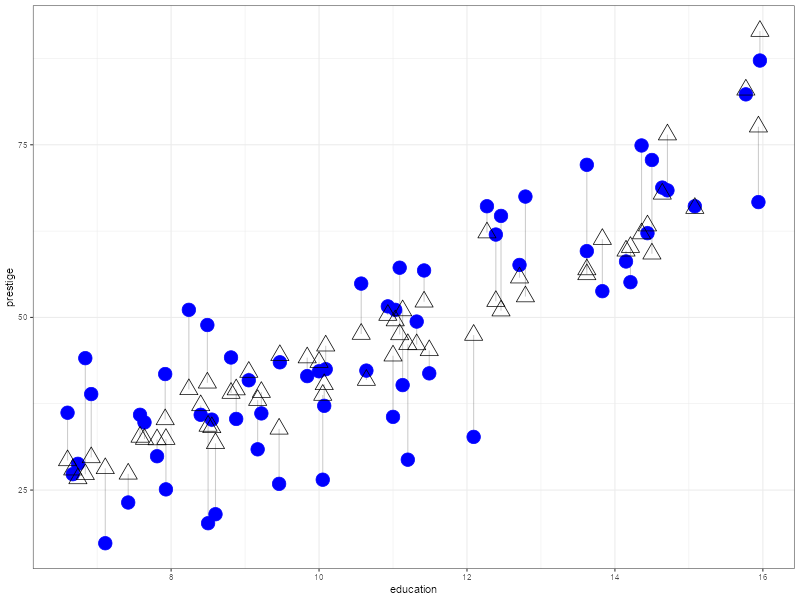

In [33]:
ggplot(tmp_data, aes(x = education, y = prestige)) +
  geom_segment(aes(xend = education, yend = predicted), alpha = .2) +
  geom_point(aes(), color = 'blue', size = 6) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +
  guides(color = FALSE) +
  geom_point(aes(y = predicted), shape = 2, size = 6) +
  theme_bw()

In [34]:
tmp_data <- data.frame(education = train_data$education,
                       income = train_data$income,
                       prestige = train_data$prestige,
                       predicted = lm_mod1$fitted.values,
                       residuals = lm_mod1$residuals) 

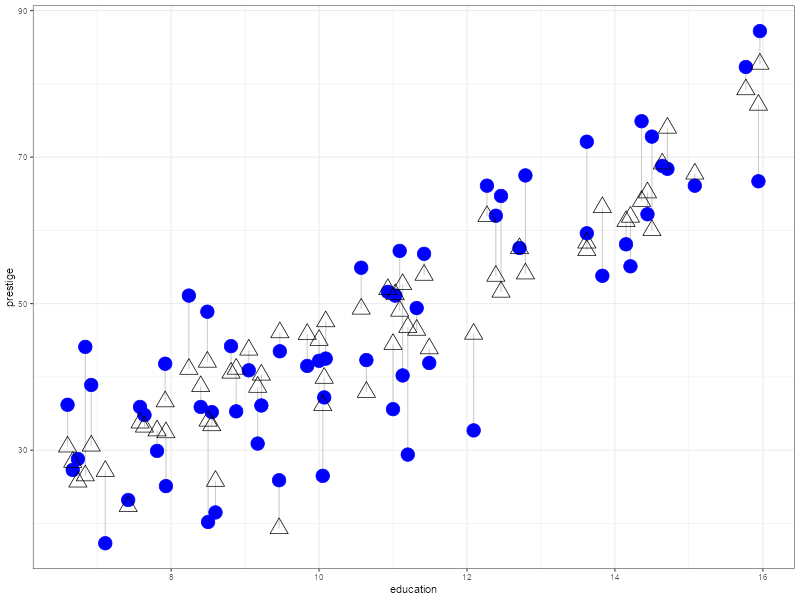

In [35]:
ggplot(tmp_data, aes(x = education, y = prestige)) +
  geom_segment(aes(xend = education, yend = predicted), alpha = .2) +
  geom_point(aes(), color = 'blue', size = 6) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +
  guides(color = FALSE) +
  geom_point(aes(y = predicted), shape = 2, size = 6) +
  theme_bw()

In [36]:
tmp_data <- data.frame(education = test_data$education,
                       income = test_data$income,
                       prestige = test_data$prestige,
                       predicted = predict(lm_mod1, newdata = test_data))

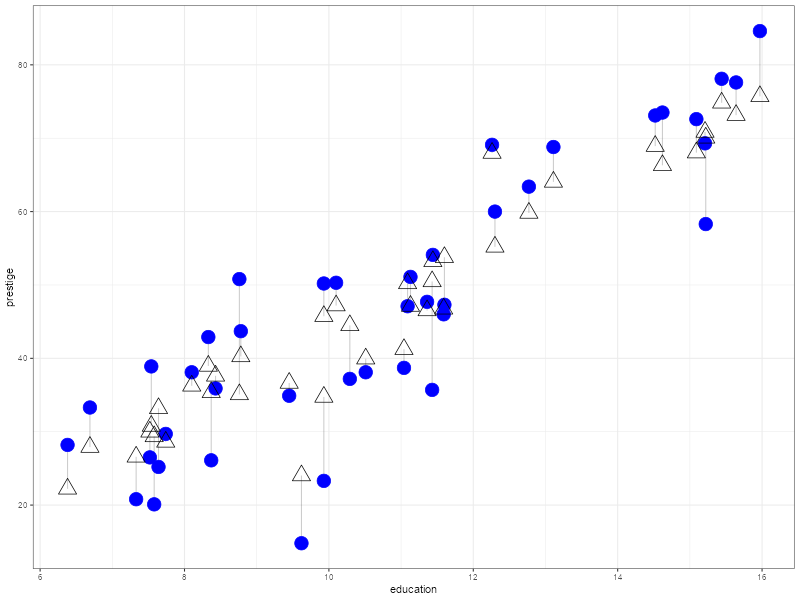

In [37]:
ggplot(tmp_data, aes(x = education, y = prestige)) +
  geom_segment(aes(xend = education, yend = predicted), alpha = .2) +
  geom_point(aes(), color = 'blue', size = 6) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +
  guides(color = FALSE) +
  geom_point(aes(y = predicted), shape = 2, size = 6) +
  theme_bw()

In [41]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [72]:
library(modelr)
results <- data.frame(
  R2 = rsquare(lm_mod, data = test_data),
  MSE = mse(lm_mod, data = test_data),
  RMSE = rmse(lm_mod, data = test_data),
  MAE = mae(lm_mod, data = test_data),
  MAPE = mape(lm_mod, data = test_data)
)
results

         R2      MSE     RMSE      MAE      MAPE
1 0.7475925 65.06918 8.066547 6.608214 0.1808047

In [73]:
results <- results |> bind_rows(data.frame(
  R2 = rsquare(lm_mod1, data = test_data),
  MSE = mse(lm_mod1, data = test_data),
  RMSE = rmse(lm_mod1, data = test_data),
  MAE = mae(lm_mod1, data = test_data),
  MAPE = mape(lm_mod1, data = test_data)
))
results

         R2      MSE     RMSE      MAE      MAPE
1 0.7475925 65.06918 8.066547 6.608214 0.1808047
2 0.7994933 51.54037 7.179162 5.774512 0.1453850

In [74]:
library(car)
vif(lm_mod)

   income education 
 1.767257  1.767257 

In [75]:
lm_mod2 <- lm(formula = prestige ~ log(income) + education + type, data = train_data)
summary(lm_mod2)


Call:
lm(formula = prestige ~ log(income) + education + type, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0602  -4.1505   0.1309   4.4382  18.2440 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -85.6830    17.4626  -4.907 8.91e-06 ***
log(income)  11.7030     2.2699   5.156 3.68e-06 ***
education     2.4152     0.8379   2.882  0.00565 ** 
typeprof     12.9815     4.9248   2.636  0.01093 *  
typewc        3.9580     3.2979   1.200  0.23531    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.485 on 54 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8822,	Adjusted R-squared:  0.8735 
F-statistic: 101.1 on 4 and 54 DF,  p-value: < 2.2e-16


In [76]:
results <- results |> bind_rows(data.frame(
  R2 = rsquare(lm_mod2, data = test_data),
  MSE = mse(lm_mod2, data = test_data),
  RMSE = rmse(lm_mod2, data = test_data),
  MAE = mae(lm_mod2, data = test_data),
  MAPE = mape(lm_mod2, data = test_data)
))
results

         R2      MSE     RMSE      MAE      MAPE
1 0.7475925 65.06918 8.066547 6.608214 0.1808047
2 0.7994933 51.54037 7.179162 5.774512 0.1453850
3 0.7925310 53.24371 7.296829 5.992226 0.1378963

In [77]:
vif(lm_mod2)

                GVIF Df GVIF^(1/(2*Df))
log(income) 2.204172  1        1.484645
education   7.714318  1        2.777466
type        8.205725  2        1.692502

In [78]:
lm_mod3 <- lm(formula = prestige ~ log(income) + education + type + women, data = train_data)
summary(lm_mod3)


Call:
lm(formula = prestige ~ log(income) + education + type + women, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7055  -2.8463  -0.1256   3.5219  15.9907 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -146.67619   25.65857  -5.716 5.10e-07 ***
log(income)   18.94446    3.16526   5.985 1.91e-07 ***
education      2.05031    0.78828   2.601  0.01202 *  
typeprof       9.22340    4.74104   1.945  0.05703 .  
typewc         0.01137    3.32560   0.003  0.99729    
women          0.13055    0.04252   3.071  0.00337 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.031 on 53 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:    0.9,	Adjusted R-squared:  0.8906 
F-statistic: 95.43 on 5 and 53 DF,  p-value: < 2.2e-16


In [79]:
results <- results |> bind_rows(data.frame(
  R2 = rsquare(lm_mod3, data = test_data),
  MSE = mse(lm_mod3, data = test_data),
  RMSE = rmse(lm_mod3, data = test_data),
  MAE = mae(lm_mod3, data = test_data),
  MAPE = mape(lm_mod3, data = test_data)
))
results

         R2      MSE     RMSE      MAE      MAPE
1 0.7475925 65.06918 8.066547 6.608214 0.1808047
2 0.7994933 51.54037 7.179162 5.774512 0.1453850
3 0.7925310 53.24371 7.296829 5.992226 0.1378963
4 0.7857536 55.48854 7.449063 6.148477 0.1362646

In [80]:
vif(lm_mod3)

                GVIF Df GVIF^(1/(2*Df))
log(income) 4.954891  1        2.225958
education   7.893700  1        2.809573
type        9.672072  2        1.763518
women       3.376307  1        1.837473